**Lab 05 - Task**

*Perceptron algorithm to the Iris dataset*


---



Load the iris dataset using scikit-learn library

Create a Pandas DataFrame with the dataset and add column names

Convert the problem into a binary classification problem by only considering two classes and removing the third one. For example, we can keep only "setosa" and "versicolor" classes and remove "virginica". Visualize the data using a scatter plot.

Split the data into train and test sets

Remove the target column from the train and test sets

Apply the built-in Perceptron algorithm from scikit-learn

Evaluate the accuracy, precision, recall, and F1 score of the model.

Apply the Perceptron algorithm from scratch using above code snippets

Evaluate the accuracy, precision, recall, and F1 score of the model.




In [247]:
#imports
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np



# Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
data = load_iris()
data

In [249]:
data.keys()


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
data.data

In [251]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [252]:
df = pd.DataFrame(data.data, columns = data.feature_names)
#df['target'] = data.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [253]:
#columns= data['feature_names'] + ['target']


In [254]:
category=[]
for i in data.target:
    category.append(data.target_names[i])

print(category)

['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicol

In [255]:
len(category)

150

In [256]:
len(df)

150

In [257]:
df['labels'] = category

In [258]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [259]:
len(df)

150

In [260]:
df.shape

(150, 5)

In [261]:
#df.iloc[start_row_index:end_row_index, start_column_index:end_column_index]
df.iloc[0:100, :]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,versicolor
96,5.7,2.9,4.2,1.3,versicolor
97,6.2,2.9,4.3,1.3,versicolor
98,5.1,2.5,3.0,1.1,versicolor


In [262]:
dfcopy = (df.iloc[0:100, :].copy())

In [263]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [264]:
dfcopy.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [265]:
# Separate features and target  
X = dfcopy.iloc[:,0:4].values
Y = dfcopy.iloc[:,4].values

In [ ]:
X

In [ ]:
Y

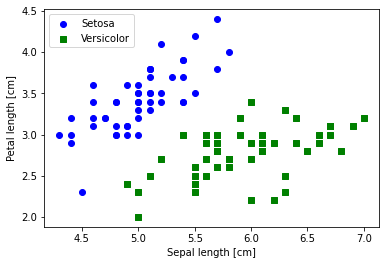

In [268]:
# Plot the data points
plt.scatter(X[:50, 0], X[:50, 1],
            color='blue', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='green', marker='s', label='Versicolor')
 
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')

In [269]:


# # Load the iris dataset
# iris = load_iris()

# # Get the sepal length and sepal width features
# X = iris.data[:, :2]

# # Get the target variable (species)
# y = iris.target

# # Plot the data points
# plt.scatter(X[:, 0], X[:, 1], c=y)
# plt.xlabel('Sepal length')
# plt.ylabel('Sepal width')
# plt.show()


In [ ]:
print(X)

In [ ]:
Y

In [272]:
X.shape

(100, 4)

In [273]:
Y.shape

(100,)

In [274]:
dfcopy

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,versicolor
96,5.7,2.9,4.2,1.3,versicolor
97,6.2,2.9,4.3,1.3,versicolor
98,5.1,2.5,3.0,1.1,versicolor


In [275]:
# Split the data into training and testing sets with 70% of the data for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(dfcopy.iloc[:, :-1], dfcopy.iloc[:, -1], test_size=0.3, random_state=0)

In [276]:
X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
60,5.0,2.0,3.5,1.0
80,5.5,2.4,3.8,1.1
90,5.5,2.6,4.4,1.2
68,6.2,2.2,4.5,1.5
51,6.4,3.2,4.5,1.5


In [277]:
len(X_train)

70

In [278]:
X_test.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
26,5.0,3.4,1.6,0.4
86,6.7,3.1,4.7,1.5
2,4.7,3.2,1.3,0.2
55,5.7,2.8,4.5,1.3
75,6.6,3.0,4.4,1.4


In [279]:
len(X_test)

30

In [280]:
y_train

60    versicolor
80    versicolor
90    versicolor
68    versicolor
51    versicolor
         ...    
96    versicolor
67    versicolor
64    versicolor
47        setosa
44        setosa
Name: labels, Length: 70, dtype: object

In [281]:
len(y_train)

70

In [282]:
len(y_test)

30

In [283]:
print(type(X_train), X_train.shape )
print(type(X_test), X_test.shape )

print(type(y_train), y_train.shape )
print(type(y_test), y_test.shape )

<class 'pandas.core.frame.DataFrame'> (70, 4)
<class 'pandas.core.frame.DataFrame'> (30, 4)
<class 'pandas.core.series.Series'> (70,)
<class 'pandas.core.series.Series'> (30,)


In [284]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)

In [285]:
print("Stats for different metrics of Setosa!")
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, pos_label='setosa'))
print('Recall:', recall_score(y_test, y_pred, pos_label='setosa'))
print('F1 score:', f1_score(y_test, y_pred, pos_label='setosa'))

Stats for different metrics of Setosa!
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0


In [286]:
print("Stats for different metrics of Versicolor!")
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, pos_label='versicolor'))
print('Recall:', recall_score(y_test, y_pred, pos_label='versicolor'))
print('F1 score:', f1_score(y_test, y_pred, pos_label='versicolor'))

Stats for different metrics of Versicolor!
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0


In [287]:
X.shape[0]

100

In [288]:
X.shape[1]

4

In [291]:
# Apply the Perceptron algorithm from scratch using above code snippets
class MyPerceptron:
    def __init__(self, _learningRate=0.1, _epochs=1000):
        self.learningRate = _learningRate
        self.epochs = _epochs
        
    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        for i in range(self.epochs):
            for j in range(X.shape[0]):
                if y[j] * (np.dot(X[j], self.weights) + self.bias) <= 0:
                    self.weights += self.learningRate * y[j] * X[j]
                    self.bias += self.learningRate * y[j]

        print(self.weights)
        print(self.bias)
    
    def predict(self, X):
        y_pred = np.sign(np.dot(X, self.weights) + self.bias)
        return np.where(y_pred == -1, 'setosa', 'versicolor')

P = MyPerceptron()
P.fit(X_train.values, y_train.replace({'setosa': -1, 'versicolor': 1}).values)

y_pred = P.predict(X_test.values)
print('Accuracy:', accuracy_score(y_test, y_pred))

[-0.02 -0.15  0.2   0.08]
0.0
Accuracy: 1.0


In [292]:
print("Stats for different metrics of Setosa!")
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, pos_label='setosa'))
print('Recall:', recall_score(y_test, y_pred, pos_label='setosa'))
print('F1 score:', f1_score(y_test, y_pred, pos_label='setosa'))

Stats for different metrics of Setosa!
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0


In [293]:
print("Stats for different metrics of Versicolor!")
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, pos_label='versicolor'))
print('Recall:', recall_score(y_test, y_pred, pos_label='versicolor'))
print('F1 score:', f1_score(y_test, y_pred, pos_label='versicolor'))

Stats for different metrics of Versicolor!
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0
